In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KernelDensity
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from scipy.stats import norm
from scipy.stats import multivariate_normal
import aa_utils


<font  style="font-size: 4rem; color: #1abc9c"> Bayesian Learning </font>

## Table of Contents
* [Exercise 1: Gaussian Naive Bayes](#exo1)
    * [Naive Bayes exploration](#section_1_1)
    * [Visualization](#section_1_2)
    * [Comparison with KDE](#section_1_3)
    * [Evaluation](#section_1_4)
* [Exercise 2: k-Nearest Neighbors](#exo2)
    * [Basic k-NN](#section_2_1)
    * [Data preprocessing](#section_2_2)
    * [Select $k$ with a validation set](#section_2_3)
   

# <font color="#1E90FF">Exercise 1: Gaussian Naive Bayes</font><a class="anchor" id="exo1"></a>

In Scikit-learn, the Gaussian Naive Bayes algorithm for classification is implemented via the <code>GaussianNB</code> class. 

https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB

    Note1  Note2  Reussite
0   94.83  45.69         1
1   40.24  71.17         0
2   75.48  90.42         1
3   91.56  88.70         1
4   74.79  41.57         0
..    ...    ...       ...
95  50.53  48.86         0
96  90.45  87.51         1
97  50.29  49.80         0
98  89.85  45.36         1
99  45.08  56.32         0

[100 rows x 3 columns]


<Axes: xlabel='X1', ylabel='X2'>

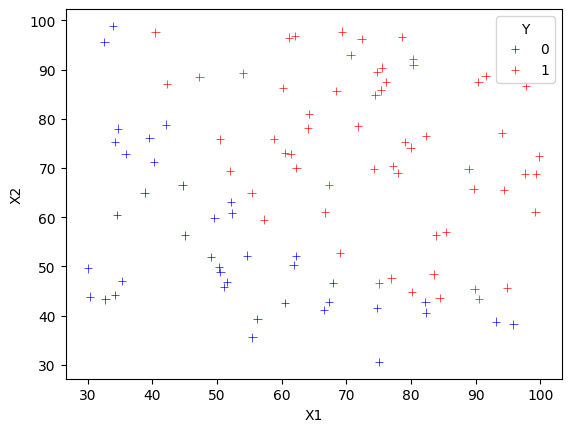

In [2]:
df = pd.read_csv('./data/data_exam.txt', sep = ' ')
print(df)
dataset = df.rename(columns={df.columns[0]: 'X1',df.columns[1]: 'X2',df.columns[2]: 'Y'})
sns.scatterplot(data=dataset, x='X1', y='X2', hue='Y', marker='+', palette=['blue','red'])

In [3]:
# Dataset split into train/test set
data_train, data_test = train_test_split(dataset, test_size = 0.3, random_state = 6)

## <font color="#9400D3">1. Gaussian Naive Bayes Exploration</font><a class="anchor" id="section_1_1"></a>

We learn a Gaussian Naive Bayes classifier on the training data, and analyze the model.

In [4]:
# learn a Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(data_train.loc[:, ['X1', 'X2']], data_train.Y)
print('Probability of each class:', gnb.class_prior_)
print('Variance of each feature per class:',gnb.var_)
print('Mean of each feature per class:',gnb.theta_)

Probability of each class: [0.45714286 0.54285714]
Variance of each feature per class: [[323.70736249 218.47146757]
 [267.41751479 256.72126832]]
Mean of each feature per class: [[53.725625   54.25125   ]
 [72.55526316 73.93710526]]


We plot the pdf (probability density function) for $x_1|w_1$ and $x_1|w_2$.

<font color="blue">**TODO:**</font> : Plot the pdf for $x_2|w_1$ and $x_2|w_2$.

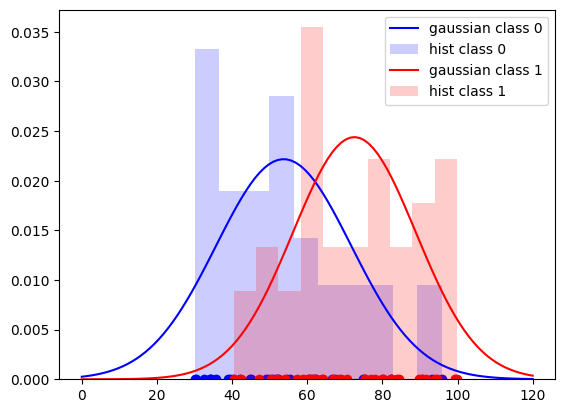

In [5]:
np_note1_w1 = data_train[data_train.Y == 0].iloc[:, 0].to_numpy()
np_note1_w2 = data_train[data_train.Y == 1].iloc[:, 0].to_numpy()

x = np.linspace(0, 120, 100)
# Plot density for class w1=0
density_w1 = norm.pdf(x, gnb.theta_[0, 0], np.sqrt(gnb.var_[0, 0]))
plt.plot(x, density_w1, color = "blue", linestyle = "-",label='gaussian class 0')
plt.hist(np_note1_w1, density=True, color='blue', alpha=0.2, label='hist class 0')
plt.scatter(np_note1_w1, np.zeros(len(np_note1_w1)), color = "blue")
# Plot density for class w2=1
density_w2 = norm.pdf(x, gnb.theta_[1, 0], np.sqrt(gnb.var_[1, 0]))
plt.plot(x, density_w2, color = "red", linestyle = "-",label='gaussian class 1')
plt.hist(np_note1_w2, density=True, color='red', alpha=0.2, label='hist class 1')
plt.scatter(np_note1_w2, np.zeros(len(np_note1_w2)), color = "red")
plt.legend(loc='upper right')

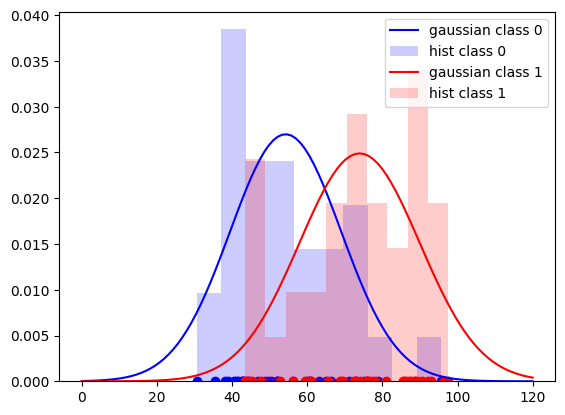

In [6]:
# TODO - Plot for x2

np_note1_w1 = data_train[data_train.Y == 0].iloc[:, 1].to_numpy()
np_note1_w2 = data_train[data_train.Y == 1].iloc[:, 1].to_numpy()

x = np.linspace(0, 120, 100)
# Plot density for class w1=0
density_w1 = norm.pdf(x, gnb.theta_[0, 1], np.sqrt(gnb.var_[0, 1]))
plt.plot(x, density_w1, color = "blue", linestyle = "-",label='gaussian class 0')
plt.hist(np_note1_w1, density=True, color='blue', alpha=0.2, label='hist class 0')
plt.scatter(np_note1_w1, np.zeros(len(np_note1_w1)), color = "blue")
# Plot density for class w2=1
density_w2 = norm.pdf(x, gnb.theta_[1, 1], np.sqrt(gnb.var_[1, 1]))
plt.plot(x, density_w2, color = "red", linestyle = "-",label='gaussian class 1')
plt.hist(np_note1_w2, density=True, color='red', alpha=0.2, label='hist class 1')
plt.scatter(np_note1_w2, np.zeros(len(np_note1_w2)), color = "red")
plt.legend(loc='upper right')

<font color="red">**Question 1:**</font> Compute the class of the first example of the test set. **You will detail the calculation in your report, indicating the formulas (math) used**, before giving their numerical values.

**Tips**:
- $P(x_i|w_j)$ is given by <code>norm.pdf</code>($x_i, \mu_j, \sigma_j$). Check the given code above that plots the densities.
- You can verify your computations using the fonction <code>predict_proba</code>. 

Usage : <code>gnb.predict_proba(data_test.iloc[0,:2].values.reshape(1, -1))</code>
- To end up with the same values, you should compute the 'real' value of $P(w|x)$, which means normalizing by $P(x)$, even if this is not needed in practice to classify the data.

Remember your probas: $P(x)=P(x|w_1) \times P(w_1) + P(x|w_2) \times P(w_2)$

In [7]:
# TO DO - 'manually' compute the class of the first example in the test set

Pw1 = gnb.class_prior_[0]
Pw2 = gnb.class_prior_[1]

x = data_test.iloc[0,:2]
Pxw1 = norm.pdf(x[0], gnb.theta_[0, 0], np.sqrt(gnb.var_[0, 0])) * norm.pdf(x[1], gnb.theta_[0, 1], np.sqrt(gnb.var_[0, 1]))
Pxw2 = norm.pdf(x[0], gnb.theta_[1, 0], np.sqrt(gnb.var_[1, 0])) * norm.pdf(x[1], gnb.theta_[1, 1], np.sqrt(gnb.var_[1, 1]))

s = Pxw1 * Pw1 + Pxw2 * Pw2
print(( Pxw1 * Pw1 / s , Pxw2 * Pw2 / s))
print( gnb.predict_proba(x.values.reshape(1,-1)) )

(np.float64(0.0221498916745052), np.float64(0.9778501083254947))
[[0.02214989 0.97785011]]


C:\Users\tomch\AppData\Local\Temp\ipykernel_5736\1976670639.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pxw1 = norm.pdf(x[0], gnb.theta_[0, 0], np.sqrt(gnb.var_[0, 0])) * norm.pdf(x[1], gnb.theta_[0, 1], np.sqrt(gnb.var_[0, 1]))
C:\Users\tomch\AppData\Local\Temp\ipykernel_5736\1976670639.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pxw2 = norm.pdf(x[0], gnb.theta_[1, 0], np.sqrt(gnb.var_[1, 0])) * norm.pdf(x[1], gnb.theta_[1, 1], np.sqrt(gnb.var_[1, 1]))
d:\GitRepo\TPS\2024-2025-ESIR-AA\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but Gauss

In [8]:
# Prior probabilities
Pw1 = gnb.class_prior_[0]
Pw2 = gnb.class_prior_[1]

# First example in the test set
x = data_test.iloc[0, :2].values

# Calculate likelihoods P(x_i|w_j) for each feature and class
Pxw1 = np.prod([norm.pdf(x[i], gnb.theta_[0, i], np.sqrt(gnb.var_[0, i])) for i in range(len(x))])
Pxw2 = np.prod([norm.pdf(x[i], gnb.theta_[1, i], np.sqrt(gnb.var_[1, i])) for i in range(len(x))])

# Joint probabilities P(w_j) * P(x|w_j)
joint_prob_w1 = Pxw1 * Pw1
joint_prob_w2 = Pxw2 * Pw2

# Evidence P(x)
evidence = joint_prob_w1 + joint_prob_w2

# Posterior probabilities P(w_j|x)
posterior_w1 = joint_prob_w1 / evidence
posterior_w2 = joint_prob_w2 / evidence

# Predicted class
predicted_class = 0 if posterior_w1 > posterior_w2 else 1

print("Posterior probabilities:", posterior_w1, posterior_w2)
print("Predicted class:", predicted_class)
print("Verified probabilities:", gnb.predict_proba(x.reshape(1, -1))[0])


Posterior probabilities: 0.0221498916745052 0.9778501083254947
Predicted class: 1
Verified probabilities: [0.02214989 0.97785011]


d:\GitRepo\TPS\2024-2025-ESIR-AA\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


## <font color="#9400D3">2. Vizualisation</font><a class="anchor" id="section_1_2"></a>

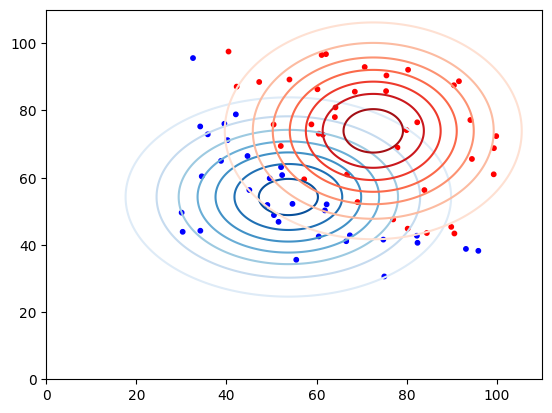

In [9]:
# Plot the gaussian NB likelihood
aa_utils.draw_gaussianNB_likelihood(gnb,data_train)

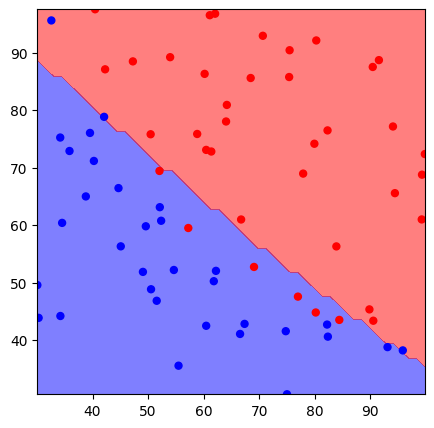

In [10]:
# Plot the NB classifier decision boundaries
aa_utils.draw_decision_boundaries(gnb,data_train)

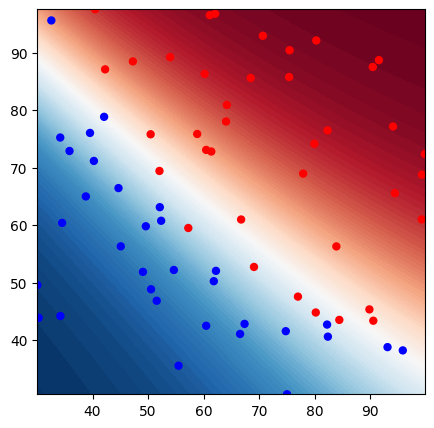

In [11]:
# plot Naive Bayes predicted probabilities for class w2
aa_utils.draw_predicted_probabilities(gnb,data_train)

<font color="red">**Question 2:**</font> For each of the figures below explain what is represented. You will indicate in each case the corresponding mathematical formula.


## <font color="#9400D3">3. Comparison with KDE</font><a class="anchor" id="section_1_3"></a>

We now compute the likelihood by Kernel Density Estimation with a 'gaussian' kernel implemented in scikit-learn by <code>KernelDensity</code> class.

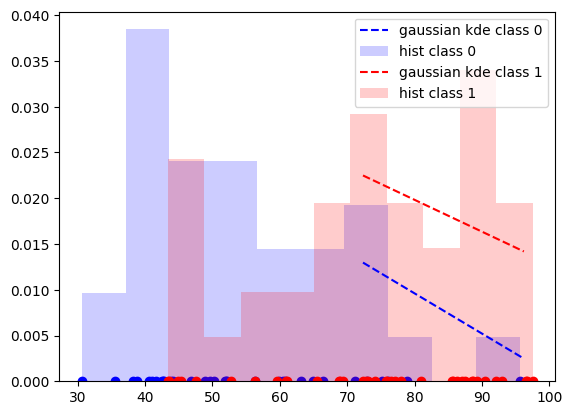

In [12]:
# Plot density for class w1=0
gkde_w1 = KernelDensity(kernel='gaussian', bandwidth=5).fit(np_note1_w1.reshape(-1, 1))
g_log_dens_w1 = gkde_w1.score_samples(x.reshape(-1, 1))
plt.plot(x,np.exp(g_log_dens_w1), color="blue",linestyle="--", label='gaussian kde class 0')
plt.hist(np_note1_w1, density=True, color='blue', alpha=0.2, label='hist class 0')
plt.scatter(np_note1_w1, np.zeros(len(np_note1_w1)), color = "blue")
# Plot density for class w2=1
gkde_w2 = KernelDensity(kernel='gaussian', bandwidth=5).fit(np_note1_w2.reshape(-1, 1))
g_log_dens_w2 = gkde_w2.score_samples(x.reshape(-1, 1))
plt.plot(x,np.exp(g_log_dens_w2), color="red",linestyle="--", label='gaussian kde class 1')
plt.hist(np_note1_w2, density=True, color='red', alpha=0.2, label='hist class 1')
plt.scatter(np_note1_w2, np.zeros(len(np_note1_w2)), color = "red")
plt.legend(loc='upper right')

<font color="red">**Question 3:**</font> 
Explain the difference between the estimation of $P(x|w)$ by a gaussian pdf, and the gaussian KDE.

<font color="red">**Question 4:**</font> Change the value of the <code>bandwith</code> parameter (give a float value). Conclude on the influence of this parameter.

Rather than assuming attributes independance and use 1D density estimation, KDE can advantageously be used on all the attributes. In our case, the kernel used is a 2D gaussian parametrized by the bandwith $h$.

<font color="blue">**TODO:**</font> Observe below the difference with the likelihood estimated by the gaussian NB. You can change the bandwith parameter value to see the effects of this hyper-parameter.

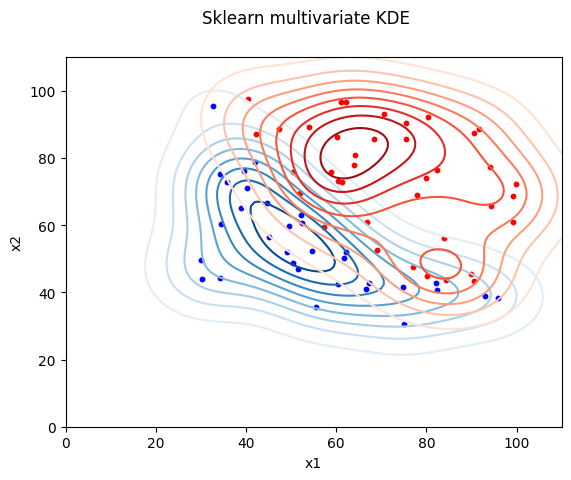

In [13]:
# Plot Multivariate KDE
# bw_h is the bandwith parameter
aa_utils.draw_sk_kde_densities(bw_h=9,data=data_train)

## <font color="#9400D3">4. Evaluation</font><a class="anchor" id="section_1_4"></a>

There is no implementation in scikit-learn of a Bayes Classifier using KDE.

<font color="blue">**TODO:**</font> Implement the KDE-based Bayes classifier.

**Hints:** Following methods will be usefull:
- <code>kde.score_samples(X)</code> : compute the log-likelihood of each sample under the model
- to get the likelihood: <code>np.exp(kde.score_samples(X))</code>

where <code>kde</code> is the Kernel Density estimator (model).

<font color="red">**Question 5:**</font> Compare **in a table** the performances in generalization of the gaussian NB and a KDE-based Bayes classifier in terms of accuracy or error, for different values of $h$ and different kernels.

<code>KernelDensity</code> implements several common kernel forms. Refer to the documentation: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KernelDensity.html

In [14]:
# TODO - Performance of NB 


In [15]:
# TODO - Bayes classification with 2D KDE and evaluation


# <font color="#1E90FF">Exercise 2: k-Nearest Neighbors</font><a class="anchor" id="exo2"></a>

## <font color="#9400D3">1. Basic k-NN</font>

We will first look at the k-nn classifier with $k=1$.


        X1     X2    Y
0    59.16  31.60  0.0
1    61.41  68.00  0.0
2    61.60  84.33  1.0
3    61.69  27.78  0.0
4    61.42  27.17  1.0
..     ...    ...  ...
995  60.06  38.46  0.0
996  61.88  34.42  0.0
997  62.49  39.04  1.0
998  63.31  67.56  1.0
999  61.22  86.92  1.0

[1000 rows x 3 columns]


<Axes: xlabel='X1', ylabel='X2'>

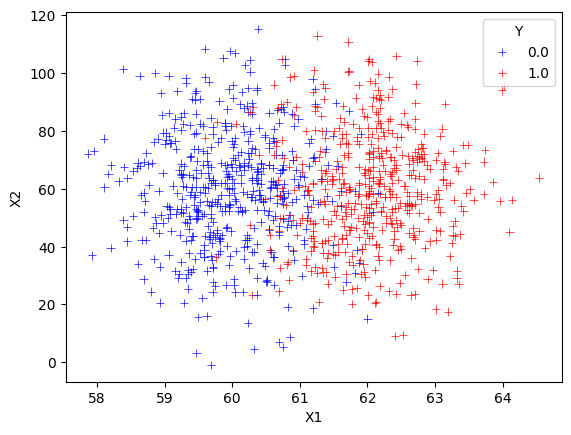

In [16]:
# load data
df = pd.read_csv('./data/knn_dataset.csv', sep = ',')
print(df)
sns.scatterplot(data=df, x='X1', y='X2', hue='Y', marker='+', palette=['blue','red'])

In [17]:
# Split data
data_train, data_test = train_test_split(df, test_size = 0.3, random_state = 13)
data_valid, data_test = train_test_split(data_test, test_size = 0.5, random_state = 13)

In [18]:
# k-NN
nn_clf = KNeighborsClassifier(n_neighbors=1) # this initializes a knn for k = 1
nn_clf.fit(data_train.iloc[:,:-1],data_train.Y)

KNeighborsClassifier(n_neighbors=1)

<font color="red">**Question 1:**</font> Which distance among samples is used to compute the nearest neighobors?

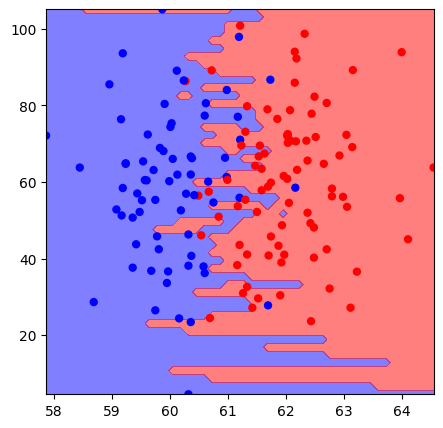

In [19]:
# Affichage frontiere de decision
aa_utils.draw_decision_boundaries(nn_clf,data_test)

In [20]:
# Knn classifier evaluation
print('Accuracy test sample :', nn_clf.score(data_test.iloc[:,:-1], data_test.Y))

Accuracy test sample : 0.8133333333333334


## <font color="#9400D3">2. Data preprocessing</font><a class="anchor" id="section_2_2"></a>

When classifiers are based on distance calculations between examples, it may be important to preprocess the data.

<Axes: xlabel='X1', ylabel='X2'>

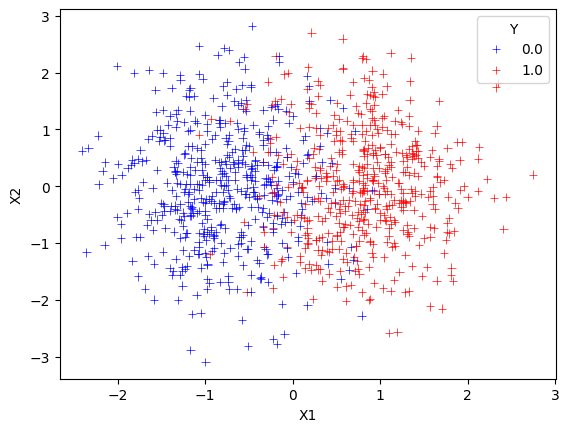

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
np_scaled=scaler.fit_transform(df.iloc[:,:-1])

df_scaled = pd.DataFrame(np_scaled, columns=['X1','X2'])
df_scaled['Y'] = df.Y
sns.scatterplot(data=df_scaled, x='X1', y='X2', hue='Y', marker='+', palette=['blue','red'])

<font color="red">**Question 2:**</font> What is the effect of the pre-processing applied here?

<font color="red">**Question 3:**</font> 
- Compare the performance of the KNN classifier using pre-processed data with the previous one. 
- Explain why the classifier benefits from the pre-processing.

In [22]:
# TODO - Evaluate the KNN classifier with pre-processed data


In [23]:
# Affichage frontiere de decision
#aa_utils.draw_decision_boundaries(model,data)

## <font color="#9400D3">3. Select $k$ with a validation set</font><a class="anchor" id="section_2_3"></a>

$k$ being an hyper-parameter of the KNN classifier, its value should be tuned using a validation set.

<font color="blue">**TODO:**</font> 
- Plot the validation error as a function of $k$
- Select the best value of $k$
- Evaluate the resulting classifier
- Plot the decision boundaries

In [24]:
# TODO - Plot the validation error as a function of the number of neighbors.


In [25]:
# Find the best hyper-parameter k


# Evaluate the classifier


In [26]:
# Affichage frontiere de decision
#aa_utils.draw_decision_boundaries(...)

<font color="red">**Question 4:**</font> Compare the performances of the (gaussian) Naive Bayes and the (tuned) k-NN classifiers.


In [27]:
# TODO - NB and k-NN classifiers comparison

